In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-ml/student_resource 3/README.md
/kaggle/input/amazon-ml/student_resource 3/sample_code.py
/kaggle/input/amazon-ml/student_resource 3/dataset/sample_test.csv
/kaggle/input/amazon-ml/student_resource 3/dataset/sample_test_out_fail.csv
/kaggle/input/amazon-ml/student_resource 3/dataset/sample_test_out.csv
/kaggle/input/amazon-ml/student_resource 3/dataset/train.csv
/kaggle/input/amazon-ml/student_resource 3/dataset/test.csv
/kaggle/input/amazon-ml/student_resource 3/src/sanity.py
/kaggle/input/amazon-ml/student_resource 3/src/constants.py
/kaggle/input/amazon-ml/student_resource 3/src/test.ipynb
/kaggle/input/amazon-ml/student_resource 3/src/utils.py


In [5]:
import os

# List the files in the dataset folder
dataset_dir = '/kaggle/input/amazon-ml/'
files = os.listdir(dataset_dir)
print(files)

['student_resource 3']


In [6]:
import os

# Path to the folder 'student_resource 3'
folder_path = '/kaggle/input/amazon-ml/student_resource 3/'

# List files in the folder
files = os.listdir(folder_path)
print(files)

['dataset', 'README.md', 'sample_code.py', 'src']


In [7]:
# Path to the 'dataset' folder
dataset_path = os.path.join(folder_path, 'dataset')

# List files in the 'dataset' folder
dataset_files = os.listdir(dataset_path)
print(dataset_files)

['sample_test.csv', 'sample_test_out_fail.csv', 'sample_test_out.csv', 'train.csv', 'test.csv']


In [8]:
import pandas as pd

# Load the training and test datasets
train_csv = os.path.join(dataset_path, 'train.csv')
test_csv = os.path.join(dataset_path, 'test.csv')

# Read the CSV files
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

# Display the first few rows of the train and test DataFrames
print("Training Data:")
print(train_df.head(10))
print("\nTest Data:")
print(test_df.head(10))

Training Data:
                                          image_link  group_id  entity_name  \
0  https://m.media-amazon.com/images/I/61I9XdN6OF...    748919  item_weight   
1  https://m.media-amazon.com/images/I/71gSRbyXmo...    916768  item_volume   
2  https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516  item_weight   
3  https://m.media-amazon.com/images/I/612mrlqiI4...    459516  item_weight   
4  https://m.media-amazon.com/images/I/617Tl40LOX...    731432  item_weight   
5  https://m.media-amazon.com/images/I/61QsBSE7jg...    731432  item_weight   
6  https://m.media-amazon.com/images/I/81xsq6vf2q...    731432  item_weight   
7  https://m.media-amazon.com/images/I/71DiLRHeZd...    731432  item_weight   
8  https://m.media-amazon.com/images/I/91Cma3Rzse...    731432  item_weight   
9  https://m.media-amazon.com/images/I/71jBLhmTNl...    731432  item_weight   

     entity_value  
0      500.0 gram  
1         1.0 cup  
2      0.709 gram  
3      0.709 gram  
4  1400 milligr

In [9]:
import requests
from PIL import Image
from io import BytesIO
import os

def download_image(image_url, save_path):
    # Sending a request to the image URL
    response = requests.get(image_url)
    
    # Checking if the response was successful
    if response.status_code == 200:
        # Opening the image using PIL and BytesIO
        img = Image.open(BytesIO(response.content))
        
        # Saving the image to the specified path within the Kaggle environment
        img.save(save_path)
        print(f"Image downloaded and saved to {save_path}")
    else:
        print(f"Failed to download image from {image_url}")




In [10]:
# Example usage
image_url = "https://m.media-amazon.com/images/I/61I9XdN6OFL.jpg"  # Replace with any valid image URL from train.csv
save_path = "downloaded_image.jpg"  # This will save the image in your Kaggle notebook's environment

# Call the function to download and save the image
download_image(image_url, save_path)

Image downloaded and saved to downloaded_image.jpg


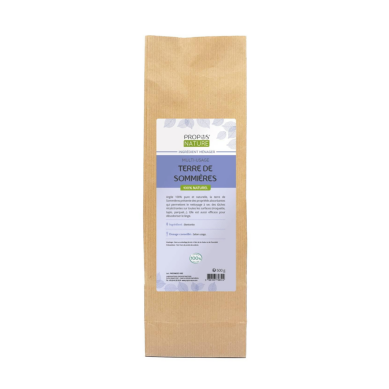

In [11]:
import matplotlib.pyplot as plt
import cv2

# Read the image using OpenCV
img = cv2.imread("downloaded_image.jpg")

# Convert the image from BGR (OpenCV's default format) to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.show()


In [12]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


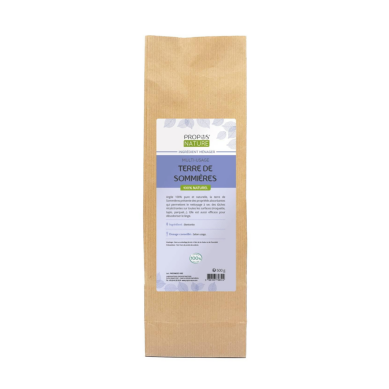

In [13]:
import cv2
from matplotlib import pyplot as plt

# Load the image using OpenCV
image = cv2.imread('downloaded_image.jpg')

# Convert BGR to RGB (since OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()


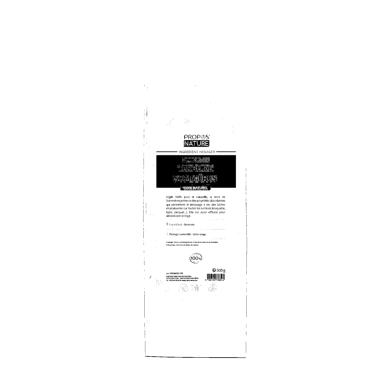

In [14]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to the grayscale image to enhance text areas
_, thresh_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)

# Display the thresholded image
plt.imshow(thresh_image, cmap='gray')
plt.axis('off')
plt.show()



In [15]:
import pytesseract

# Extract text from the thresholded image
extracted_text = pytesseract.image_to_string(thresh_image)

# Print the extracted text
print("Extracted Text:\n", extracted_text)


Extracted Text:
  

 

 

PROPSS’
iN

INGREDIENT MENAGER

 

 

Argile 100% pure et naturelle, la terre de
Sommigres préserite des proprlétés ebsorbantes
qui permetient le nettoyage 4 sec des Laches
récalcitcantes sur toutes les surfaces (maquette,
(apis, parquet... flle est aussi effieace pour
Ssadoriser le linge.

$ lngrésient: Bemonie

7 Dosage conseillé : Selon usage.

setage Care srembtagsuin aan ce turate nan
resent hres se,

 

Lot NSO .008 @500¢

semerensarts om |MIIATIIM

   

 

 



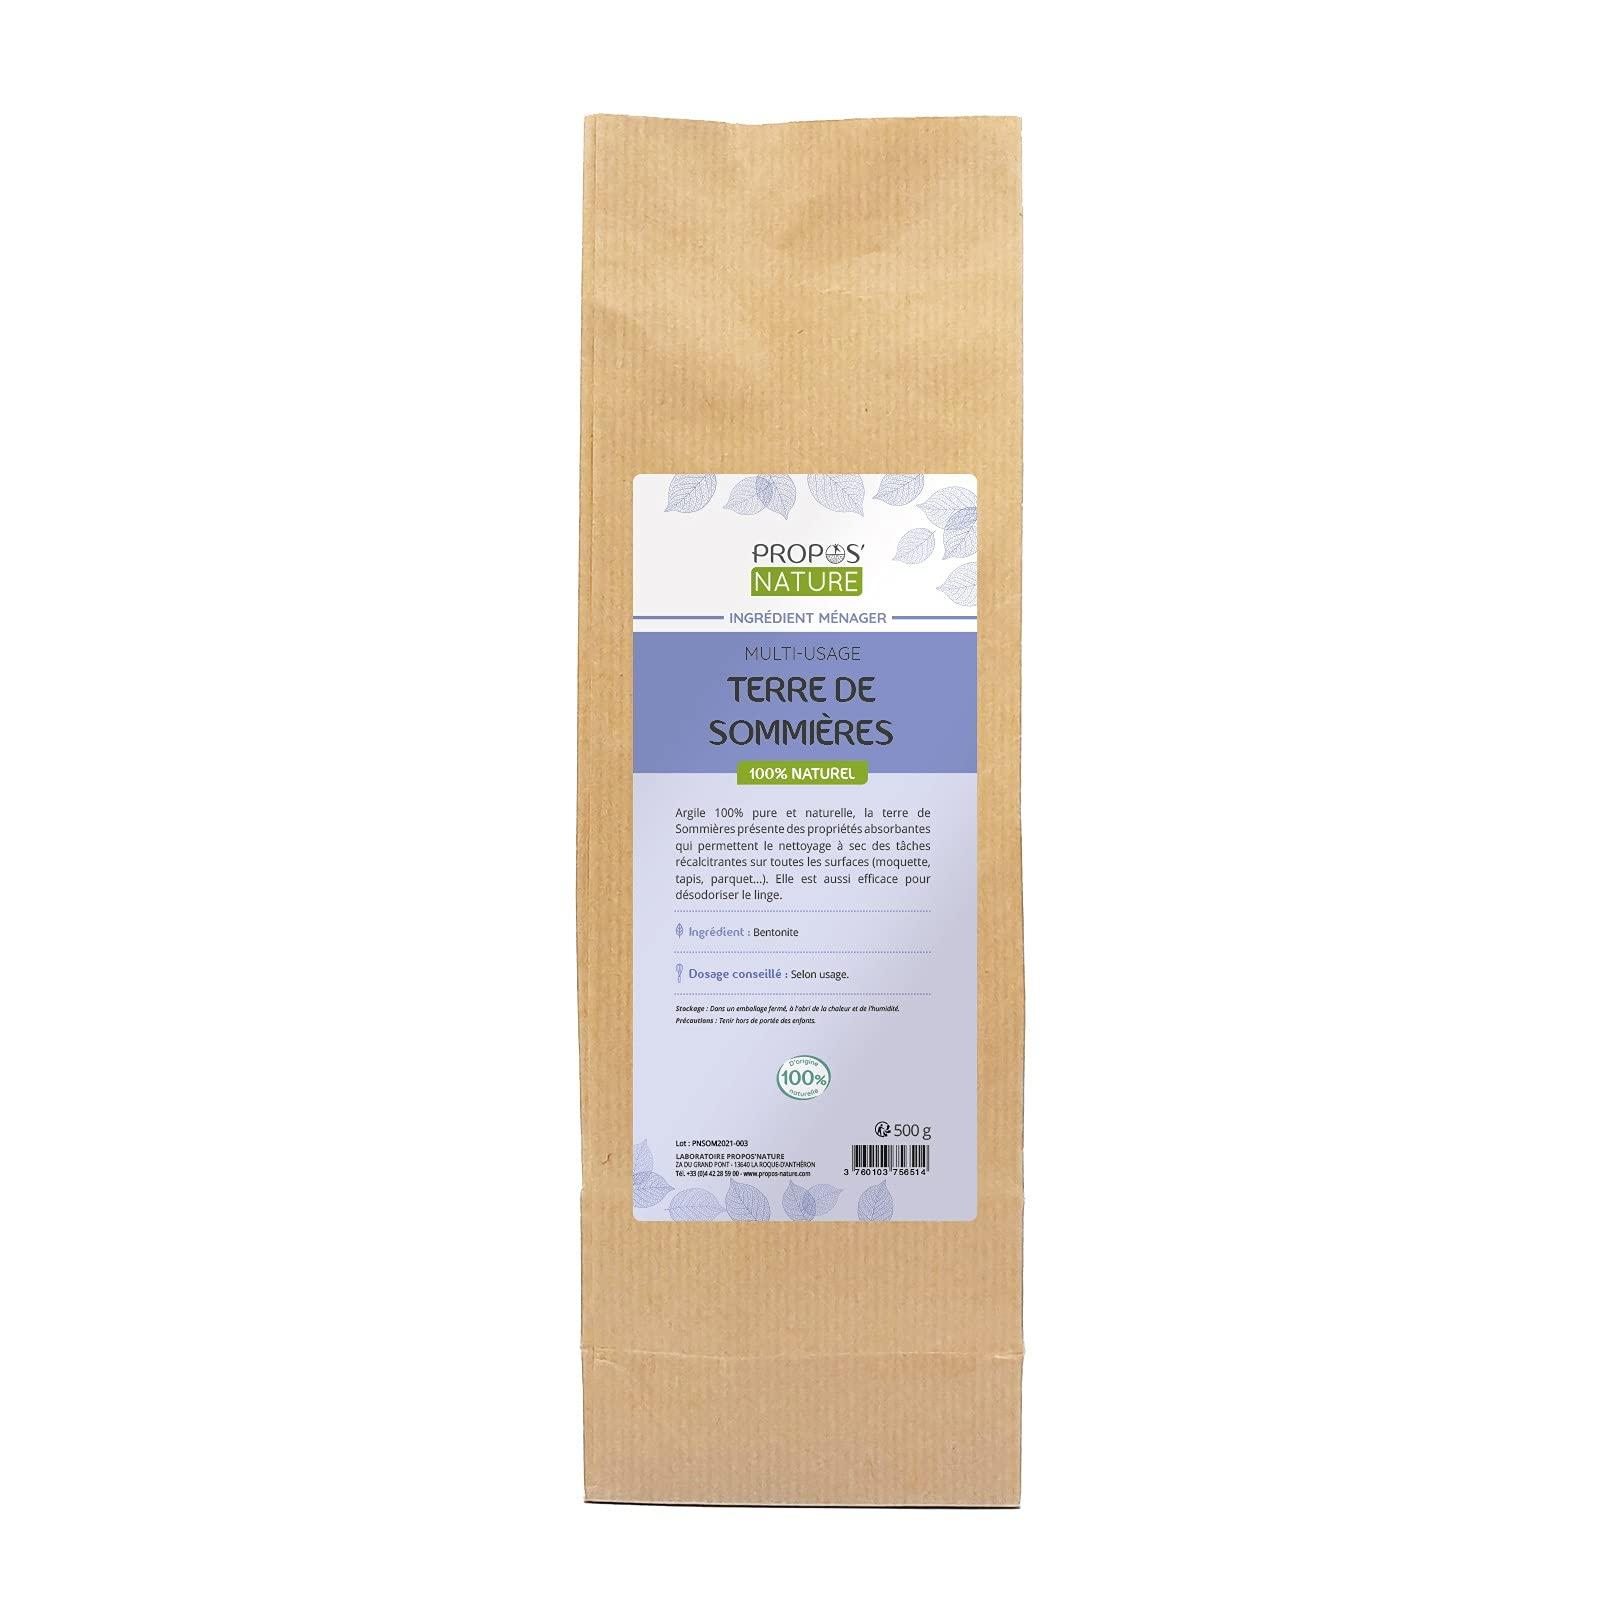

In [16]:
from IPython.display import Image as display_image
display_image(filename="downloaded_image.jpg")


In [17]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract
!pip install pytesseract opencv-python


Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
import os
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms
import sys

# Set the folder path for the dataset and src files
folder_path = '/kaggle/input/amazon-ml/student_resource 3/'
dataset_dir = os.path.join(folder_path, 'dataset')
src_dir = os.path.join(folder_path, 'src')

# List the files in the dataset folder
print("Dataset files: ", os.listdir(dataset_dir))
print("Source files: ", os.listdir(src_dir))

# Add src to the Python path
sys.path.insert(0, src_dir)

# Import necessary modules from the src folder
import constants
import utils

# Load the train.csv file
train_csv = os.path.join(dataset_dir, 'train.csv')
train_df = pd.read_csv(train_csv)

# Check the contents of the training data
print("Training Data:")
print(train_df.head())

# Custom Dataset class to handle the loading of images
class CustomDataset(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image_link = self.df.iloc[idx, 0]
        entity_name = self.df.iloc[idx, 2]
        entity_value = self.df.iloc[idx, 3]
        return image_link, entity_name, entity_value

# Initialize dataset
train_data = CustomDataset(train_df)

# Batch loading
batch_size = 10150
train_dataloader = DataLoader(train_data, batch_size=batch_size, num_workers=4, shuffle=True)

# Get the first batch
for one_batch in train_dataloader:
    break

# Download images using utils.py from the src folder
utils.download_images(one_batch[0], 'images')

# Verify that images were downloaded
print("Number of images downloaded: ", len(os.listdir('images')))

# Clean up the images folder after batch processing to save space
import shutil
shutil.rmtree('images')


Dataset files:  ['sample_test.csv', 'sample_test_out_fail.csv', 'sample_test_out.csv', 'train.csv', 'test.csv']
Source files:  ['sanity.py', 'constants.py', 'test.ipynb', 'utils.py']
Training Data:
                                          image_link  group_id  entity_name  \
0  https://m.media-amazon.com/images/I/61I9XdN6OF...    748919  item_weight   
1  https://m.media-amazon.com/images/I/71gSRbyXmo...    916768  item_volume   
2  https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516  item_weight   
3  https://m.media-amazon.com/images/I/612mrlqiI4...    459516  item_weight   
4  https://m.media-amazon.com/images/I/617Tl40LOX...    731432  item_weight   

     entity_value  
0      500.0 gram  
1         1.0 cup  
2      0.709 gram  
3      0.709 gram  
4  1400 milligram  


  0%|          | 0/10150 [00:00<?, ?it/s]Process ForkPoolWorker-49:
Process ForkPoolWorker-55:
Process ForkPoolWorker-37:
Process ForkPoolWorker-43:
Process ForkPoolWorker-63:
Process ForkPoolWorker-42:
Process ForkPoolWorker-41:
Process ForkPoolWorker-53:
Process ForkPoolWorker-64:
Process ForkPoolWorker-65:
Process ForkPoolWorker-36:
Process ForkPoolWorker-58:
Process ForkPoolWorker-45:
Traceback (most recent call last):
Process ForkPoolWorker-52:
Process ForkPoolWorker-48:
Process ForkPoolWorker-39:
Process ForkPoolWorker-62:
Process ForkPoolWorker-46:
Process ForkPoolWorker-68:
Process ForkPoolWorker-57:
Process ForkPoolWorker-40:
Process ForkPoolWorker-59:
Process ForkPoolWorker-44:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-31:
Process ForkPoolWorker-32:
Traceback (most recent call last):
Process ForkPoolWorker-54:
Process ForkPoolWorker-35:
Traceback (most recent call last):
Process ForkPoolWorker-34:
Process ForkPoolWorker-33:
T

In [28]:
all_entity_names = list(train_df.entity_name.unique())
test_entity_names = list(test_df.entity_name.unique())

print(f"Number of entity names in train data = {len(all_entity_names)}")
print(f"Number of entity names in test data = {len(test_entity_names)}\n")

print(f"Are the entity names same in train and test data ?\nAnswer: {set(all_entity_names) == set(test_entity_names)}")

Number of entity names in train data = 8
Number of entity names in test data = 8

Are the entity names same in train and test data ?
Answer: True


In [29]:
class CustomDataset(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):
        image_link = self.df.iloc[idx, 0]
        entity_name = self.df.iloc[idx, 2]
        entity_value = self.df.iloc[idx, 3]
        return image_link, entity_name, entity_value

In [31]:
train_data = CustomDataset(train_df)

In [32]:
print(train_data[0])
print()
print(len(train_data))

('https://m.media-amazon.com/images/I/61I9XdN6OFL.jpg', 'item_weight', '500.0 gram')

263859


In [33]:
batch_size = 10150

In [34]:
train_dataloader = DataLoader(train_data, batch_size = batch_size, num_workers = 4, shuffle = True)

In [35]:
for one_batch in train_dataloader:
    break

In [36]:
len(train_dataloader)

26

In [37]:
len(one_batch[0])

10150

In [38]:
utils.download_images(one_batch[0], 'images')

  1%|          | 68/10150 [01:18<3:15:04,  1.16s/it] 


KeyboardInterrupt: 

In [39]:
len(os.listdir('images'))

7861

In [ ]:
shutil.rmtree('images')

In [41]:
entity_unit_map = constants.entity_unit_map
entity_unit_map

{'width': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'},
 'depth': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'},
 'height': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'},
 'item_weight': {'gram',
  'kilogram',
  'microgram',
  'milligram',
  'ounce',
  'pound',
  'ton'},
 'maximum_weight_recommendation': {'gram',
  'kilogram',
  'microgram',
  'milligram',
  'ounce',
  'pound',
  'ton'},
 'voltage': {'kilovolt', 'millivolt', 'volt'},
 'wattage': {'kilowatt', 'watt'},
 'item_volume': {'centilitre',
  'cubic foot',
  'cubic inch',
  'cup',
  'decilitre',
  'fluid ounce',
  'gallon',
  'imperial gallon',
  'litre',
  'microlitre',
  'millilitre',
  'pint',
  'quart'}}